In [1]:
#Driver deployment gap analysis by lolitha for the duration 1st Sep, 2022 to 30th Sep, 2022

Problem statement
- From order tracking, the data is combined based on the date. no of drivers deployed each day and number of slots and number of order for the is calculated respectively.
- From App data, the data is combined/grouped based on date,no of drivers deployed /day.
- Finally from the two data set, gap between the vehicle deployment details are calculated.
- Order tracking data /MIS Consolidated data downloaded from metabase
- app data is downloaded from moeving app

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#importing the tables (Order tracking data)
OT=pd.read_csv("D:\OT_AD\Driver\OT_Driver.csv")

OT.head(5)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2572\248162358.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  OT=pd.read_csv("D:\OT_AD\Driver\OT_Driver.csv")


,Timestamp,Supervisor,Client,FormFactor,TotalNumberOfVehicles,TotalNumberOfCaptains,NumberOfOrders,NumberOfSlots,Date,City,...,Month,NumberOfSlotsUdaan,NumberOfEntriesPerCity,RevenueDiff,RecordedDate,DaysDifference,CutOffTime,RecordedTime,TimeComparison,NumberOfDays
0,07/04/2021 20:29:00,V1-NA,BigBasket,2W,1.0,1.0,0.0,1.0,07/04/2021,Pune,...,April,NaN,654.0,0,07/04/2021,88,09:30,20:29,Beyond Time,30
1,13/07/2021 21:38:00,V1-NA,BigBasket,2W,1.0,1.0,NaN,1.0,13/07/2021,Pune,...,July,NaN,4774.0,0,13/07/2021,,09:30,21:38,Beyond Time,31
2,26/02/2022 21:59:12,Pushpak,Zepto,2W,1.0,1.0,1.0,1.0,26/02/2022,Pune,...,February,NaN,NaN,0,26/02/2022,,09:30,21:59,Beyond Time,28
3,21/06/2021 18:40:00,V1-NA,BigBasket,2W,1.0,1.0,1.0,1.0,21/06/2021,Pune,...,June,NaN,3680.0,0,21/06/2021,,09:30,18:40,Beyond Time,30
4,21/06/2021 08:38:00,V1-NA,BigBasket,2W,1.0,1.0,1.0,1.0,21/06/2021,Pune,...,June,NaN,3666.0,0,21/06/2021,,09:30,08:38,Beyond Time,30


In [3]:
#importing the app data
AD=pd.read_csv("D:\OT_AD\Driver\AD_Driver.csv")
AD.head(5)

#how to read first sheet of csv


,City,Entpreneur,Vehicle,Model,Driver,DriverID,Client,Reporting_Location,Date,ime,Checkout_Time
0,Bengaluru,Abhishek S,KA05AK7971,Ape E-Xtra,Abhishek S,3523.0,FK-grocery,FK-Grocery ITPL,09-10-2022,05:30:00Z,NaN
1,Bengaluru,Abhishek S,KA05AK7971,Ape E-Xtra,Abhishek S,3523.0,FK-grocery,FK-Grocery ITPL,11-10-2022,05:30:00Z,NaN
2,Bengaluru,Abhishek S,KA05AK7971,Ape E-Xtra,Abhishek S,3523.0,FK-grocery,FK-Grocery ITPL,01-10-2022,05:30:00Z,NaN
3,Bengaluru,Abhishek S,KA05AK7971,Ape E-Xtra,Abhishek S,3523.0,FK-grocery,FK-Grocery ITPL,03-10-2022,05:30:00Z,NaN
4,Bengaluru,Abhishek S,KA05AK7971,Ape E-Xtra,Abhishek S,3523.0,FK-grocery,FK-Grocery ITPL,07-10-2022,05:30:00Z,NaN


In [4]:
#Selecting necessary columns
AD1=AD[['City','Driver','Client','Date']]
AD1.head()

,City,Driver,Client,Date
0,Bengaluru,Abhishek S,FK-grocery,09-10-2022
1,Bengaluru,Abhishek S,FK-grocery,11-10-2022
2,Bengaluru,Abhishek S,FK-grocery,01-10-2022
3,Bengaluru,Abhishek S,FK-grocery,03-10-2022
4,Bengaluru,Abhishek S,FK-grocery,07-10-2022


In [6]:
#retaining required columns
OT1=OT[["Date", "Client", "City", "FormFactor","TotalNumberOfCaptains","NumberOfOrders","NumberOfSlots"]]



Replacing the values for clients real name

In [7]:
AD1['Client'] = AD1['Client'].replace(['Compass Group','Google Compass','compaas'],['Compass','Compass','Compass'])


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2572\2032438035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AD1['Client'] = AD1['Client'].replace(['Compass Group','Google Compass','compaas'],['Compass','Compass','Compass'])


In [8]:
OT1['Client'] = OT1['Client'].replace(['Compass Group','Google Compass','compaas'],['Compass','Compass','Compass'])


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2572\3163303613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OT1['Client'] = OT1['Client'].replace(['Compass Group','Google Compass','compaas'],['Compass','Compass','Compass'])


Data Analysing

In [9]:
#identifying datatypes
OT1.dtypes

Date                      object
Client                    object
City                      object
FormFactor                object
TotalNumberOfCaptains    float64
NumberOfOrders           float64
NumberOfSlots            float64
dtype: object

In [10]:
#identifying datatypes
AD1.dtypes

City      object
Driver    object
Client    object
Date      object
dtype: object

Datetime conversion

In [11]:

OT1['Date'] = pd.to_datetime(OT1['Date'],dayfirst=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2572\1835316942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OT1['Date'] = pd.to_datetime(OT1['Date'],dayfirst=True)


In [12]:
AD1['Date']=pd.to_datetime(AD1['Date'],dayfirst=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2572\2701947010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AD1['Date']=pd.to_datetime(AD1['Date'],dayfirst=True)





Combining columns

In [13]:
#Combining City and client column in order tracking data
OT1['Client_ID']=(OT1['City']+ ' '+OT1['Client'])
OT1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2572\57856175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OT1['Client_ID']=(OT1['City']+ ' '+OT1['Client'])


,Date,Client,City,FormFactor,TotalNumberOfCaptains,NumberOfOrders,NumberOfSlots,Client_ID
0,2021-04-07,BigBasket,Pune,2W,1.0,0.0,1.0,Pune BigBasket
1,2021-07-13,BigBasket,Pune,2W,1.0,NaN,1.0,Pune BigBasket
2,2022-02-26,Zepto,Pune,2W,1.0,1.0,1.0,Pune Zepto
3,2021-06-21,BigBasket,Pune,2W,1.0,1.0,1.0,Pune BigBasket
4,2021-06-21,BigBasket,Pune,2W,1.0,1.0,1.0,Pune BigBasket
...,...,...,...,...,...,...,...,...
50291,2022-06-28,DHL,Coimbatore,2W,3.0,16.0,1.0,Coimbatore DHL
50292,2022-06-10,DHL,Coimbatore,2W,3.0,42.0,1.0,Coimbatore DHL
50293,2022-04-21,DHL,Coimbatore,2W,3.0,34.0,1.0,Coimbatore DHL
50294,2022-05-11,DHL,Coimbatore,2W,3.0,32.0,1.0,Coimbatore DHL


In [14]:
# Replacing the values in rows


In [15]:
#Concating the column client and City
AD1['Client_ID']=(AD1['City']+ ' '+AD1['Client'])
AD1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2572\507916194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AD1['Client_ID']=(AD1['City']+ ' '+AD1['Client'])


,City,Driver,Client,Date,Client_ID
0,Bengaluru,Abhishek S,FK-grocery,2022-10-09,Bengaluru FK-grocery
1,Bengaluru,Abhishek S,FK-grocery,2022-10-11,Bengaluru FK-grocery
2,Bengaluru,Abhishek S,FK-grocery,2022-10-01,Bengaluru FK-grocery
3,Bengaluru,Abhishek S,FK-grocery,2022-10-03,Bengaluru FK-grocery
4,Bengaluru,Abhishek S,FK-grocery,2022-10-07,Bengaluru FK-grocery
...,...,...,...,...,...
201664,Pune,Priyanka naresh kadam,Bigbasket,2022-06-22,Pune Bigbasket
201665,Pune,Priyanka naresh kadam,Bigbasket,2022-06-16,Pune Bigbasket
201666,Pune,Priyanka naresh kadam,Bigbasket,2022-06-18,Pune Bigbasket
201667,Pune,Priyanka naresh kadam,Bigbasket,2022-06-29,Pune Bigbasket


Grouping Data from eAch df

In [18]:
#Adding the grouped data to th df

gp_AD=AD1.groupby(["Date",'City','Client','Client_ID'], as_index=False)['Driver'].count()
print(gp_AD)



            Date       City      Client            Client_ID  Driver
0     2021-08-27  Bengaluru   Bigbasket  Bengaluru Bigbasket       4
1     2021-08-28  Bengaluru   Bigbasket  Bengaluru Bigbasket       2
2     2021-08-29  Bengaluru   Bigbasket  Bengaluru Bigbasket       1
3     2021-08-30  Bengaluru   Bigbasket  Bengaluru Bigbasket       1
4     2021-09-04  Bengaluru   Bigbasket  Bengaluru Bigbasket       1
...          ...        ...         ...                  ...     ...
20388 2022-10-11       Pune     Compass         Pune Compass       4
20389 2022-10-11       Pune         DHL             Pune DHL       6
20390 2022-10-11       Pune  FK-grocery      Pune FK-grocery      34
20391 2022-10-11       Pune    Flipkart        Pune Flipkart       5
20392 2022-10-11       Pune         JSW             Pune JSW       4

[20393 rows x 5 columns]


In [19]:

gp_AD.to_csv(r'D:\OT_AD\flt_DAppdata.csv', index=False)


In [21]:
# fill the NaN values with 0
OT1 = OT1.fillna(0)

#attempt to convert 'TotalNumberOfVehicles' column from float to integer
OT1['TotalNumberOfCaptains'] = OT1['TotalNumberOfCaptains'].astype(int)
OT1['NumberOfOrders'] = OT1['NumberOfOrders'].astype(int)
OT1['NumberOfSlots'] = OT1['NumberOfSlots'].astype(int)

print("After conversion \n",OT1)

After conversion 
             Date     Client        City FormFactor  TotalNumberOfCaptains  \
0     2021-04-07  BigBasket        Pune         2W                      1   
1     2021-07-13  BigBasket        Pune         2W                      1   
2     2022-02-26      Zepto        Pune         2W                      1   
3     2021-06-21  BigBasket        Pune         2W                      1   
4     2021-06-21  BigBasket        Pune         2W                      1   
...          ...        ...         ...        ...                    ...   
50291 2022-06-28        DHL  Coimbatore         2W                      3   
50292 2022-06-10        DHL  Coimbatore         2W                      3   
50293 2022-04-21        DHL  Coimbatore         2W                      3   
50294 2022-05-11        DHL  Coimbatore         2W                      3   
50295 2022-06-30        DHL  Coimbatore         2W                      3   

       NumberOfOrders  NumberOfSlots       Client_ID  
0

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2572\1179303210.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gp_OT=OT1.groupby(["Date",'City','Client','Client_ID'],as_index=False)['TotalNumberOfCaptains','NumberOfOrders','NumberOfSlots'].apply(lambda x:x.astype(int).sum())


            Date   City               Client                 Client_ID  \
0     2021-02-22   Pune            BigBasket            Pune BigBasket   
1     2021-02-23   Pune            BigBasket            Pune BigBasket   
2     2021-02-24   Pune            BigBasket            Pune BigBasket   
3     2021-02-25  Noida            BigBasket           Noida BigBasket   
4     2021-02-25   Pune            BigBasket            Pune BigBasket   
...          ...    ...                  ...                       ...   
29132 2022-10-10   Pune            BigBasket            Pune BigBasket   
29133 2022-10-10   Pune              Compass              Pune Compass   
29134 2022-10-10   Pune                  DHL                  Pune DHL   
29135 2022-10-10   Pune           FK-Grocery           Pune FK-Grocery   
29136 2022-10-10   Pune  JSW Altigreen/Euler  Pune JSW Altigreen/Euler   

       TotalNumberOfCaptains  NumberOfOrders  NumberOfSlots  
0                          4              22     

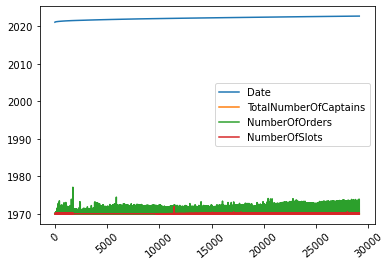

In [22]:
#Grouping the data based on date, Client_ID and count the no of vehicle
gp_OT=OT1.groupby(["Date",'City','Client','Client_ID'],as_index=False)['TotalNumberOfCaptains','NumberOfOrders','NumberOfSlots'].apply(lambda x:x.astype(int).sum())

print(gp_OT)

# plot the result
gp_OT.plot()
plt.xticks(rotation=40)
plt.show()




In [23]:
#Exporting the order tracking df
gp_OT.to_csv(r'D:\OT_AD\Driver\flt_OTD.csv', index=False)

In [24]:
gp_AD.to_csv(r'D:\OT_AD\Driver\flt_AppdataD.csv', index=False)

In [25]:


## Merge the DataFrames
df=pd.merge(gp_OT,gp_AD, on=['Client_ID'],how='inner', suffixes=('','_remove'))

  
# remove the duplicate columns
df.drop([i for i in df.columns if 'remove' in i],
       axis=1, inplace=True)

print(df)

              Date       City     Client           Client_ID  \
0       2021-03-22  Bengaluru   Flipkart  Bengaluru Flipkart   
1       2021-03-22  Bengaluru   Flipkart  Bengaluru Flipkart   
2       2021-03-22  Bengaluru   Flipkart  Bengaluru Flipkart   
3       2021-03-22  Bengaluru   Flipkart  Bengaluru Flipkart   
4       2021-03-22  Bengaluru   Flipkart  Bengaluru Flipkart   
...            ...        ...        ...                 ...   
2963725 2022-10-07    Chennai  Tata Play   Chennai Tata Play   
2963726 2022-10-07    Chennai  Tata Play   Chennai Tata Play   
2963727 2022-10-08    Chennai  Tata Play   Chennai Tata Play   
2963728 2022-10-08    Chennai  Tata Play   Chennai Tata Play   
2963729 2022-10-08    Chennai  Tata Play   Chennai Tata Play   

         TotalNumberOfCaptains  NumberOfOrders  NumberOfSlots  Driver  
0                            1              35              1       3  
1                            1              35              1       9  
2              

In [26]:
df=pd.pivot_table(df,index=['City','Client','Client_ID','Date','NumberOfOrders','NumberOfSlots','TotalNumberOfCaptains','Driver'],values=['NumberOfOrders','NumberOfSlots','TotalNumberOfCaptains','Driver'],aggfunc='sum')


In [27]:
df

Empty DataFrame
Columns: []
Index: [(Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-01 00:00:00, 158, 8, 8, 9), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-01 00:00:00, 158, 8, 8, 10), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-01 00:00:00, 158, 8, 8, 12), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-01 00:00:00, 158, 8, 8, 14), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-01 00:00:00, 158, 8, 8, 17), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-01 00:00:00, 158, 8, 8, 18), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-01 00:00:00, 158, 8, 8, 19), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-02 00:00:00, 224, 15, 9, 9), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-02 00:00:00, 224, 15, 9, 10), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-02 00:00:00, 224, 15, 9, 12), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-02 00:00:00, 224, 15, 9, 14), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-02 00:00:00, 224, 15, 9, 17), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-02 00:00:00, 224, 15, 9, 18), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-02 00:00:00, 224, 15, 9, 19), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-03 00:00:00, 176, 9, 7, 9), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-03 00:00:00, 176, 9, 7, 10), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-03 00:00:00, 176, 9, 7, 12), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-03 00:00:00, 176, 9, 7, 14), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-03 00:00:00, 176, 9, 7, 17), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-03 00:00:00, 176, 9, 7, 18), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-03 00:00:00, 176, 9, 7, 19), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-04 00:00:00, 88, 6, 6, 9), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-04 00:00:00, 88, 6, 6, 10), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-04 00:00:00, 88, 6, 6, 12), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-04 00:00:00, 88, 6, 6, 14), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-04 00:00:00, 88, 6, 6, 17), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-04 00:00:00, 88, 6, 6, 18), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-04 00:00:00, 88, 6, 6, 19), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-05 00:00:00, 161, 8, 8, 9), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-05 00:00:00, 161, 8, 8, 10), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-05 00:00:00, 161, 8, 8, 12), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-05 00:00:00, 161, 8, 8, 14), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-05 00:00:00, 161, 8, 8, 17), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-05 00:00:00, 161, 8, 8, 18), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-05 00:00:00, 161, 8, 8, 19), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-06 00:00:00, 260, 14, 10, 9), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-06 00:00:00, 260, 14, 10, 10), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-06 00:00:00, 260, 14, 10, 12), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-06 00:00:00, 260, 14, 10, 14), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-06 00:00:00, 260, 14, 10, 17), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-06 00:00:00, 260, 14, 10, 18), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-06 00:00:00, 260, 14, 10, 19), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-07 00:00:00, 166, 10, 8, 9), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-07 00:00:00, 166, 10, 8, 10), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-07 00:00:00, 166, 10, 8, 12), (Bengaluru, Amazon Ecom, Bengaluru Amazon Ecom, 2022-10-07 00:00:00, 166, 10, 8, 14), (Bengaluru, Amazon Ecom, Bengaluru Amazon E

In [28]:
df.reset_index(inplace=True)

#Renaming the columns
df1=df.rename(columns={'TotalNumberOfCaptains':'Driver_OT','Driver':'Driver_AD'})

df1

,City,Client,Client_ID,Date,NumberOfOrders,NumberOfSlots,Driver_OT,Driver_AD
0,Bengaluru,Amazon Ecom,Bengaluru Amazon Ecom,2022-10-01,158,8,8,9
1,Bengaluru,Amazon Ecom,Bengaluru Amazon Ecom,2022-10-01,158,8,8,10
2,Bengaluru,Amazon Ecom,Bengaluru Amazon Ecom,2022-10-01,158,8,8,12
3,Bengaluru,Amazon Ecom,Bengaluru Amazon Ecom,2022-10-01,158,8,8,14
4,Bengaluru,Amazon Ecom,Bengaluru Amazon Ecom,2022-10-01,158,8,8,17
...,...,...,...,...,...,...,...,...
180152,Pune,Zepto,Pune Zepto,2022-06-05,22,0,1,0
180153,Pune,Zepto,Pune Zepto,2022-06-07,23,0,2,0
180154,Pune,Zepto,Pune Zepto,2022-06-08,14,0,1,0
180155,Pune,Zepto,Pune Zepto,2022-06-09,29,0,2,0


In [29]:
df.reset_index(inplace=True)

#Renaming the columns
df1=df.rename(columns={'TotalNumberOfCaptains':'Driver_OT','Driver':'Driver_AD'})

df1

,index,City,Client,Client_ID,Date,NumberOfOrders,NumberOfSlots,Driver_OT,Driver_AD
0,0,Bengaluru,Amazon Ecom,Bengaluru Amazon Ecom,2022-10-01,158,8,8,9
1,1,Bengaluru,Amazon Ecom,Bengaluru Amazon Ecom,2022-10-01,158,8,8,10
2,2,Bengaluru,Amazon Ecom,Bengaluru Amazon Ecom,2022-10-01,158,8,8,12
3,3,Bengaluru,Amazon Ecom,Bengaluru Amazon Ecom,2022-10-01,158,8,8,14
4,4,Bengaluru,Amazon Ecom,Bengaluru Amazon Ecom,2022-10-01,158,8,8,17
...,...,...,...,...,...,...,...,...,...
180152,180152,Pune,Zepto,Pune Zepto,2022-06-05,22,0,1,0
180153,180153,Pune,Zepto,Pune Zepto,2022-06-07,23,0,2,0
180154,180154,Pune,Zepto,Pune Zepto,2022-06-08,14,0,1,0
180155,180155,Pune,Zepto,Pune Zepto,2022-06-09,29,0,2,0


In [30]:
#Add an empty colum
df1['Deployment GAP'] = ''
# now let's subtract the values of two columns
df1['Deployment GAP']=(df1['Driver_OT'] - df1['Driver_AD'])

In [31]:
df1.head()

,index,City,Client,Client_ID,Date,NumberOfOrders,NumberOfSlots,Driver_OT,Driver_AD,Deployment GAP
0,0,Bengaluru,Amazon Ecom,Bengaluru Amazon Ecom,2022-10-01,158,8,8,9,-1
1,1,Bengaluru,Amazon Ecom,Bengaluru Amazon Ecom,2022-10-01,158,8,8,10,-2
2,2,Bengaluru,Amazon Ecom,Bengaluru Amazon Ecom,2022-10-01,158,8,8,12,-4
3,3,Bengaluru,Amazon Ecom,Bengaluru Amazon Ecom,2022-10-01,158,8,8,14,-6
4,4,Bengaluru,Amazon Ecom,Bengaluru Amazon Ecom,2022-10-01,158,8,8,17,-9


In [33]:
df1.to_csv(r'D:\OT_AD\Driver\Final_data_Driver.csv', index=True)